In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import config

In [2]:
df = pd.read_csv('maize.csv', index_col=0)
print(df)

     year  month  day        tp           ssr        temp  wind_speed  \
0    2019      6   14  0.000405  2.531833e+07  302.943363   20.583712   
1    2019      6   15  0.000000  2.247385e+07  303.718934   56.989214   
2    2019      6   16  0.000020  2.311338e+07  300.310264   44.144011   
3    2019      6   17  0.000027  2.494433e+07  302.782760   46.247298   
4    2019      6   18  0.000020  2.636700e+07  304.548111   72.426627   
..    ...    ...  ...       ...           ...         ...         ...   
467  2023      9    6  0.000036  2.140012e+07  300.507935   69.744911   
468  2023      9    7  0.000044  2.004272e+07  301.553751   37.022578   
469  2023      9    8  0.000710  1.872082e+07  300.866022   45.324208   
470  2023      9    9  0.026282  1.713858e+07  298.859484   41.834611   
471  2023      9   10  0.003666  1.537576e+07  298.711981   12.479365   

     wind_direct   dvs   wlv   wst   wso   tagp   lai  
0     180.378949  0.00     8     3     0     10  0.01  
1     178.8

In [3]:
# 区分训练集和测试集
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str), format='%Y-%m-%d')
train = df[(df['date'] >= config.maize_train_span[0][0]) &
                             (df['date'] <= config.maize_train_span[-1][1])]
test = df[(df['date'] >= config.maize_test_span[0][0]) &
                             (df['date'] <= config.maize_test_span[-1][1])]
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)

In [4]:
# 对train进行归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
print(train_scaled)
# 对test使用train的数据进行归一化
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)
print(test_scaled)

         year     month       day        tp       ssr      temp  wind_speed  \
0   -1.354594 -1.507504 -0.205844 -0.361195  1.151826  1.040255   -1.117524   
1   -1.354594 -1.507504 -0.090752 -0.364059  0.693027  1.301414    0.105247   
2   -1.354594 -1.507504  0.024341 -0.363915  0.796180  0.153606   -0.326192   
3   -1.354594 -1.507504  0.139433 -0.363871  1.091502  0.986174   -0.255548   
4   -1.354594 -1.507504  0.254525 -0.363915  1.320972  1.580624    0.623751   
..        ...       ...       ...       ...       ...       ...         ...   
378  1.342856  1.563635 -0.320936 -0.363723  0.084670 -1.377598    2.367003   
379  1.342856  1.563635 -0.205844 -0.117720 -1.060200 -1.639211    2.177904   
380  1.342856  1.563635 -0.090752 -0.290707 -0.943496 -1.818115    2.434369   
381  1.342856  1.563635  0.024341 -0.363915  0.288100 -0.909952   -1.163785   
382  1.342856  1.563635  0.139433 -0.363944  0.345894 -0.219902   -0.240720   

     wind_direct       dvs       wlv       wst     

In [5]:
# 将归一化模型导出
from joblib import dump
dump(scaler, 'scaler.joblib')

['scaler.joblib']

## 对WLV进行分析

In [6]:
# train_wlv = train_scaled.drop(['dvs', 'wst', 'wso', 'tagp', 'lai'], axis=1)
rows1 = train_scaled[:len(train_scaled)-6].reset_index(drop=True)
rows2 = train_scaled[1:len(train_scaled)-5].reset_index(drop=True)
rows3 = train_scaled[2:len(train_scaled)-4].reset_index(drop=True)
rows4 = train_scaled[3:len(train_scaled)-3].reset_index(drop=True)
rows5 = train_scaled[4:len(train_scaled)-2].reset_index(drop=True)
rows6 = train_scaled[5:len(train_scaled)-1].reset_index(drop=True)
rows7 = train_scaled[6:].reset_index(drop=True)
# 将rows7的其他target删去
rows7 = rows7.drop(['dvs', 'wlv', 'wst', 'wso', 'tagp', 'lai'], axis=1)
# 进行拼接
train_input = pd.concat([rows1, rows2, rows3, rows4, rows5, rows6, rows7], axis=1, ignore_index=True)
print(train_input)

           0         1         2         3         4         5         6   \
0   -1.354594 -1.507504 -0.205844 -0.361195  1.151826  1.040255 -1.117524   
1   -1.354594 -1.507504 -0.090752 -0.364059  0.693027  1.301414  0.105247   
2   -1.354594 -1.507504  0.024341 -0.363915  0.796180  0.153606 -0.326192   
3   -1.354594 -1.507504  0.139433 -0.363871  1.091502  0.986174 -0.255548   
4   -1.354594 -1.507504  0.254525 -0.363915  1.320972  1.580624  0.623751   
..        ...       ...       ...       ...       ...       ...       ...   
372  1.342856  1.563635 -1.011490 -0.364059  0.782244 -0.033658 -0.266704   
373  1.342856  1.563635 -0.896398 -0.363934  0.381310 -0.214527  1.272452   
374  1.342856  1.563635 -0.781305 -0.363733  0.067729 -0.488764 -0.178705   
375  1.342856  1.563635 -0.666213 -0.363819  0.321773 -0.607183 -1.123517   
376  1.342856  1.563635 -0.551121 -0.337901  0.066683 -0.531393 -1.694155   

           7         8         9   ...        82        83        84  \
0  

In [7]:
train_target = train['wlv'][6:].reset_index(drop=True)
print(train_target)

0        17
1        18
2        20
3        23
4        27
       ... 
372    1524
373    1466
374    1349
375    1260
376    1260
Name: wlv, Length: 377, dtype: int64


In [8]:
# PCA分析
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=4)
train_pca = pca.fit_transform(train_input)

train_pca = pd.DataFrame(train_pca, columns=['A1', 'A2', 'A3', 'A4'])
# 打印累计解释方差
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.39572598 0.0769636  0.0716173  0.05084392]


In [9]:
# 处理测试集
rows1 = test_scaled[:len(test_scaled)-6].reset_index(drop=True)
rows2 = test_scaled[1:len(test_scaled)-5].reset_index(drop=True)
rows3 = test_scaled[2:len(test_scaled)-4].reset_index(drop=True)
rows4 = test_scaled[3:len(test_scaled)-3].reset_index(drop=True)
rows5 = test_scaled[4:len(test_scaled)-2].reset_index(drop=True)
rows6 = test_scaled[5:len(test_scaled)-1].reset_index(drop=True)
rows7 = test_scaled[6:].reset_index(drop=True)
# 将rows7的其他target删去
rows7 = rows7.drop(['dvs', 'wlv', 'wst', 'wso', 'tagp', 'lai'], axis=1)
# 进行拼接
test_input = pd.concat([rows1, rows2, rows3, rows4, rows5, rows6, rows7], axis=1, ignore_index=True)
print(test_input)
test_target = test['wlv'][6:].reset_index(drop=True)
print(test_target)
# 使用训练集的PCA进行主成分分析
test_pca = pca.transform(test_input)
test_pca = pd.DataFrame(test_pca, columns=['A1', 'A2', 'A3', 'A4']) 
print(test_pca)

          0         1         2         3         4         5         6   \
0   2.242006 -1.507504 -0.205844 -0.363902  1.419076  0.833424  0.044161   
1   2.242006 -1.507504 -0.090752 -0.363972  1.585420  1.729279  1.099721   
2   2.242006 -1.507504  0.024341 -0.359081  0.565932  1.558815  0.489395   
3   2.242006 -1.507504  0.139433 -0.356173 -0.063463  0.012878  0.927684   
4   2.242006 -1.507504  0.254525 -0.294781 -0.153033 -0.033810 -0.088087   
..       ...       ...       ...       ...       ...       ...       ...   
78  2.242006  0.539922  1.750725 -0.348902  0.599936 -0.168206  1.475512   
79  2.242006  1.563635 -1.702044 -0.329156 -0.049607 -0.065389 -0.397330   
80  2.242006  1.563635 -1.586952 -0.352352  0.068665  0.081952  0.514887   
81  2.242006  1.563635 -1.471859 -0.362841  0.486825  0.249230  1.313335   
82  2.242006  1.563635 -1.356767 -0.360863  0.415069  0.315731 -0.759488   

          7         8         9   ...        82        83        84        85  \
0   0.

### 多元回归分析

In [10]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target)

LinearRegression()

In [11]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [  99.724149     28.07239975 -166.41748222   -4.54599177]
Intercept: 1066.1671087533157


train: 0        17
1        18
2        20
3        23
4        27
       ... 
372    1524
373    1466
374    1349
375    1260
376    1260
Name: wlv, Length: 377, dtype: int64
predictions: [ 104.24131127   89.71428103   83.7903335    84.56476688  132.35021662
  180.254973    230.84891985  246.72369666  288.42777537  275.30702393
  264.56900427  266.69932175  296.65691326  309.19023962  296.83532896
  230.67058718  182.73199926  129.38242439  153.24587712  184.06133598
  240.06251614  323.65094286  461.74985644  531.6485847   543.06976657
  520.88013832  517.37315183  551.81553146  593.20945699  620.06341417
  711.00080225  825.10151962  945.42926485 1029.02350044 1144.36355812
 1259.94361133 1395.26933227 1530.61084924 1700.96345288 1894.52707611
 2067.98091625 2150.98678718 2192.68864602 2214.28752107 2195.16279636
 2155.06438702 2147.6376818  2074.35313677 2011.12011299 1998.04480708
 1976.27011899 1952.08133976 1935.30490384 1951.42297557 1970.30221501
 1972.13073429 1974.97746524 1

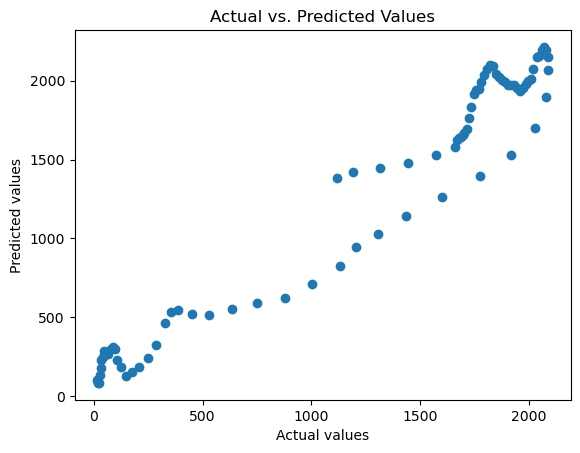

In [13]:
# 预测
predictions = model.predict(test_pca)
print('train:', train_target)
print('predictions:', predictions)
print('true value:', test_target)
# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
plt.scatter(test_target, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions = best_svr.predict(test_pca)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 138.43035494968018
MSE of the best model: 32756.883984354004


### 随机森林回归分析

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_input)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 300}
MAE of the best model: 32.350723358896886
MSE of the best model: 2626.1485702626


### 保存PCA模型以及三个机器学习模型

In [69]:
from joblib import dump
# 保存PCA模型
dump(pca, 'wlv_pca.joblib')
# 保存多元线性回归模型
dump(model, 'wlv_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'wlv_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'wlv_rfr.joblib')

['wlv_rfr.joblib']

## 对WST进行分析

In [16]:
print(train_input)
print(train_pca)

           0         1         2         3         4         5         6   \
0   -1.354594 -1.507504 -0.205844 -0.361195  1.151826  1.040255 -1.117524   
1   -1.354594 -1.507504 -0.090752 -0.364059  0.693027  1.301414  0.105247   
2   -1.354594 -1.507504  0.024341 -0.363915  0.796180  0.153606 -0.326192   
3   -1.354594 -1.507504  0.139433 -0.363871  1.091502  0.986174 -0.255548   
4   -1.354594 -1.507504  0.254525 -0.363915  1.320972  1.580624  0.623751   
..        ...       ...       ...       ...       ...       ...       ...   
372  1.342856  1.563635 -1.011490 -0.364059  0.782244 -0.033658 -0.266704   
373  1.342856  1.563635 -0.896398 -0.363934  0.381310 -0.214527  1.272452   
374  1.342856  1.563635 -0.781305 -0.363733  0.067729 -0.488764 -0.178705   
375  1.342856  1.563635 -0.666213 -0.363819  0.321773 -0.607183 -1.123517   
376  1.342856  1.563635 -0.551121 -0.337901  0.066683 -0.531393 -1.694155   

           7         8         9   ...        82        83        84  \
0  

In [17]:
train_target = train['wst'][6:].reset_index(drop=True)
print(train_target)

0         6
1         7
2         8
3        10
4        12
       ... 
372    1489
373    1460
374    1432
375    1404
376    1376
Name: wst, Length: 377, dtype: int64


In [18]:
# 处理测试集
print(test_input)
print(test_pca)

          0         1         2         3         4         5         6   \
0   2.242006 -1.507504 -0.205844 -0.363902  1.419076  0.833424  0.044161   
1   2.242006 -1.507504 -0.090752 -0.363972  1.585420  1.729279  1.099721   
2   2.242006 -1.507504  0.024341 -0.359081  0.565932  1.558815  0.489395   
3   2.242006 -1.507504  0.139433 -0.356173 -0.063463  0.012878  0.927684   
4   2.242006 -1.507504  0.254525 -0.294781 -0.153033 -0.033810 -0.088087   
..       ...       ...       ...       ...       ...       ...       ...   
78  2.242006  0.539922  1.750725 -0.348902  0.599936 -0.168206  1.475512   
79  2.242006  1.563635 -1.702044 -0.329156 -0.049607 -0.065389 -0.397330   
80  2.242006  1.563635 -1.586952 -0.352352  0.068665  0.081952  0.514887   
81  2.242006  1.563635 -1.471859 -0.362841  0.486825  0.249230  1.313335   
82  2.242006  1.563635 -1.356767 -0.360863  0.415069  0.315731 -0.759488   

          7         8         9   ...        82        83        84        85  \
0   0.

In [19]:
test_target = test['wst'][6:].reset_index(drop=True)
print(test_target)

0        6
1        7
2        8
3       10
4       12
      ... 
78    1716
79    1683
80    1651
81    1619
82    1586
Name: wst, Length: 83, dtype: int64


### 多元回归分析

In [20]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target)

LinearRegression()

In [21]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [ 117.20122796   36.73679604 -178.3051426     0.73434662]
Intercept: 1138.3527851458887


R-squared: 0.9792377037195674
MAE: 107.92125483105583
MSE: 17303.88976954353


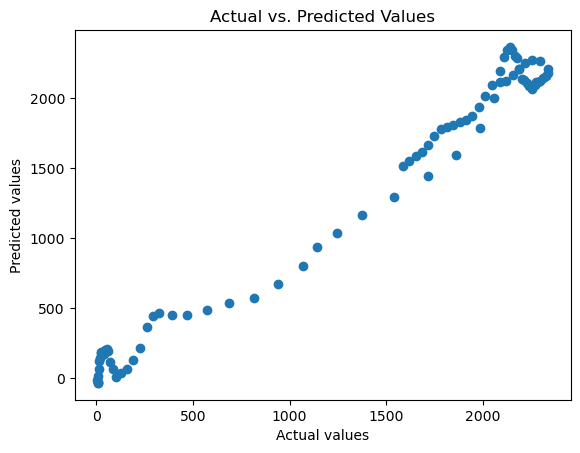

In [22]:
# 预测
predictions = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
plt.scatter(test_target, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions = best_svr.predict(test_pca)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 107.3070297556428
MSE of the best model: 18805.388451394032


### 随机森林回归分析

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_input)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': None, 'n_estimators': 200}
MAE of the best model: 36.74963855421685
MSE of the best model: 3658.371569277108


### 保存三个机器学习模型

In [84]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'wst_mlr.joblib')
# 保存支持向量回归模型
dump(svr, 'wst_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'wst_rfr.joblib')

['wst_rfr.joblib']

## 对WSO进行分析

In [105]:
train_target = train['wso'][6:].reset_index(drop=True)
print(train_target)
test_target = test['wso'][6:].reset_index(drop=True)
print(test_target)

0         0
1         0
2         0
3         0
4         0
       ... 
372    7151
373    7324
374    7429
375    7537
376    7691
Name: wso, Length: 377, dtype: int64
0        0
1        0
2        0
3        0
4        0
      ... 
78    7483
79    7659
80    7827
81    7985
82    8131
Name: wso, Length: 83, dtype: int64


### 多元回归分析

In [106]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target)

LinearRegression()

In [107]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [360.36547149 -55.07084897 263.98140032  90.70602786]
Intercept: 2017.310344827586


R-squared: 0.8789069488127357
MAE: 796.6423371732309
MSE: 928133.5011933836


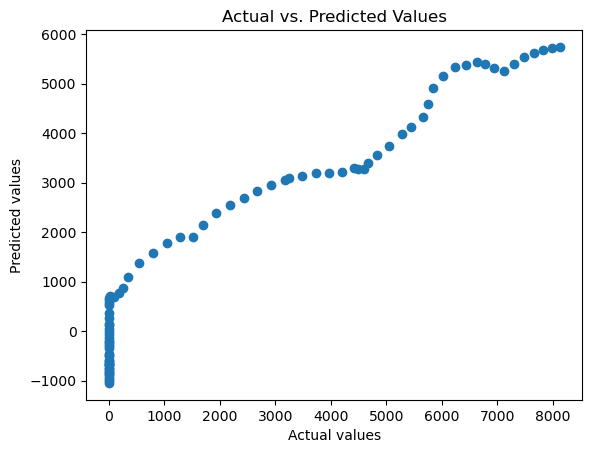

In [108]:
# 预测
predictions = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
plt.scatter(test_target, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions = best_svr.predict(test_pca)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 717.7620203168508
MSE of the best model: 807727.2664850055


### 随机森林回归分析

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_input)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 100}
MAE of the best model: 204.74838243449994
MSE of the best model: 122692.6009317453


### 保存三个机器学习模型

In [111]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'wso_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'wso_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'wso_rfr.joblib')

['wso_rfr.joblib']

## 对DVS进行分析

In [112]:
train_target = train['dvs'][6:].reset_index(drop=True)
print(train_target)
test_target = test['dvs'][6:].reset_index(drop=True)
print(test_target)

0      0.13
1      0.15
2      0.17
3      0.20
4      0.22
       ... 
372    1.93
373    1.94
374    1.96
375    1.98
376    2.00
Name: dvs, Length: 377, dtype: float64
0     0.12
1     0.14
2     0.16
3     0.18
4     0.21
      ... 
78    1.92
79    1.94
80    1.96
81    1.99
82    2.02
Name: dvs, Length: 83, dtype: float64


### 多元回归分析

In [113]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target)

LinearRegression()

In [114]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.08722864  0.00651932 -0.01530356 -0.00141288]
Intercept: 0.9992838196286471


R-squared: 0.9256957897093037
MAE: 0.131271924505624
MSE: 0.023275620759527372


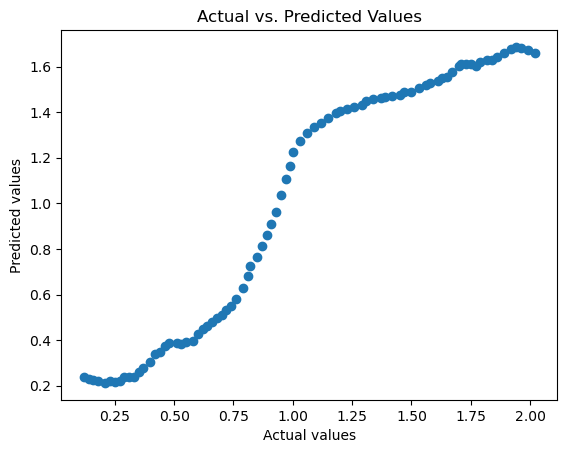

In [115]:
# 预测
predictions = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
plt.scatter(test_target, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions = best_svr.predict(test_pca)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
MAE of the best model: 0.06801355491710458
MSE of the best model: 0.009354728887053387


### 随机森林回归分析

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_input)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': None, 'n_estimators': 300}
MAE of the best model: 0.020185140562248856
MSE of the best model: 0.003334566091030776


### 保存三个机器学习模型

In [119]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'dvs_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'dvs_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'dvs_rfr.joblib')

['dvs_rfr.joblib']

## 对TAGP进行分析

In [120]:
train_target = train['tagp'][6:].reset_index(drop=True)
print(train_target)
test_target = test['tagp'][6:].reset_index(drop=True)
print(test_target)

0         23
1         25
2         29
3         33
4         39
       ...  
372    11705
373    11879
374    11985
375    12093
376    12248
Name: tagp, Length: 377, dtype: int64
0        21
1        25
2        29
3        34
4        40
      ...  
78    12252
79    12431
80    12600
81    12758
82    12905
Name: tagp, Length: 83, dtype: int64


### 多元回归分析

In [121]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target)

LinearRegression()

In [122]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [ 6.39877585e+02  2.11105742e-01 -1.38310031e+01  9.09722828e+01]
Intercept: 4545.811671087533


R-squared: 0.9370199646948523
MAE: 850.2713187268233
MSE: 1251179.9876985578


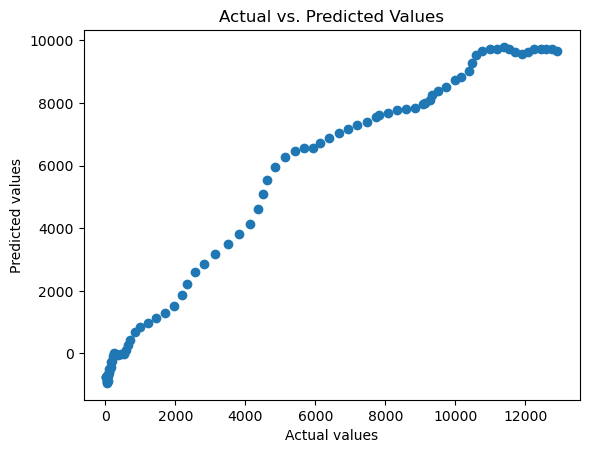

In [123]:
# 预测
predictions = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
plt.scatter(test_target, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions = best_svr.predict(test_pca)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 809.2364465259235
MSE of the best model: 1197914.7547588227


### 随机森林回归分析

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_input)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 300}
MAE of the best model: 383.35022591732206
MSE of the best model: 377839.3661407082


### 保存三个机器学习模型

In [128]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'tagp_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'tagp_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'tagp_rfr.joblib')

['tagp_rfr.joblib']

## 对LAI进行分析

In [129]:
train_target = train['lai'][6:].reset_index(drop=True)
print(train_target)
test_target = test['lai'][6:].reset_index(drop=True)
print(test_target)

0      0.03
1      0.03
2      0.03
3      0.04
4      0.05
       ... 
372    5.73
373    5.53
374    5.12
375    4.80
376    4.80
Name: lai, Length: 377, dtype: float64
0     0.03
1     0.03
2     0.03
3     0.04
4     0.05
      ... 
78    5.87
79    5.43
80    4.99
81    4.54
82    4.29
Name: lai, Length: 83, dtype: float64


### 多元回归分析

In [130]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target)

LinearRegression()

In [131]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.38169617  0.08173166 -0.5798758  -0.01235231]
Intercept: 3.745994694960212


R-squared: 0.9686471389854592
MAE: 0.4229214348783734
MSE: 0.2697746117018825


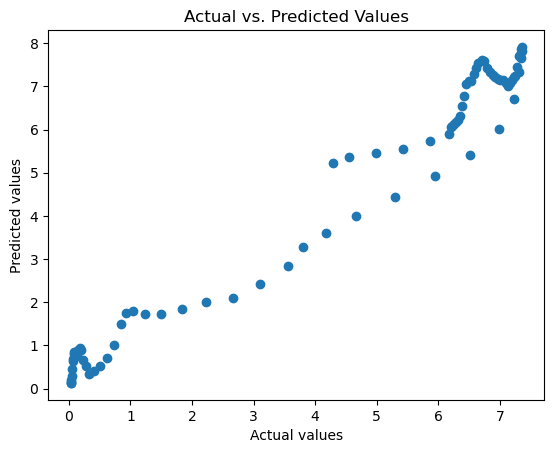

In [132]:
# 预测
predictions = model.predict(test_pca)
print('predictions:', predictions)
print('true value:', test_target)
# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
plt.scatter(test_target, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions = best_svr.predict(test_pca)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 0.411790704963269
MSE of the best model: 0.28195929028553557


### 随机森林回归分析

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_input)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 200}
MAE of the best model: 0.10277798258968834
MSE of the best model: 0.02927521737049756


### 保存三个机器学习模型

In [135]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'lai_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'lai_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'lai_rfr.joblib')

['lai_rfr.joblib']